## ASS1_PART1: Digits Dataset 

# Imports

In [181]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from itertools import combinations




import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [80]:
#load the digits dataset as frames
digits = load_digits(as_frame=True)
digits_df = digits.frame

In [81]:
print(f"**Description:** {digits.DESCR}")



**Description:** .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are co

# Dataset structure view

In [82]:
# first lets look at the head of the df
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [83]:
# Verifying dataset structure: dimensions and data types
print(f'dataset shape: {digits_df.shape}')
# Verifying dataset columns
print(f'dataset columns: {digits_df.columns}')
# Verifying dataset data types
print(f'dataset dtypes:  {digits_df.dtypes}')

dataset shape: (1797, 65)
dataset columns: Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')
d

In [84]:
# Verifying if there are duplications
print(f'amount of duplicates row: {digits_df.duplicated().sum()}')


amount of duplicates row: 0


# Observing Data Distribution using BoxPlot
A boxplot is a chart that shows a summary of a dataset. It shows the minimum and maximum values, the middle 50% of the data, and the median value. The whiskers (lines) show the range of the data outside the middle 50%. Boxplots are useful for understanding how a dataset is distributed and for identifying outliers.


![Boxplot Example](https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png)


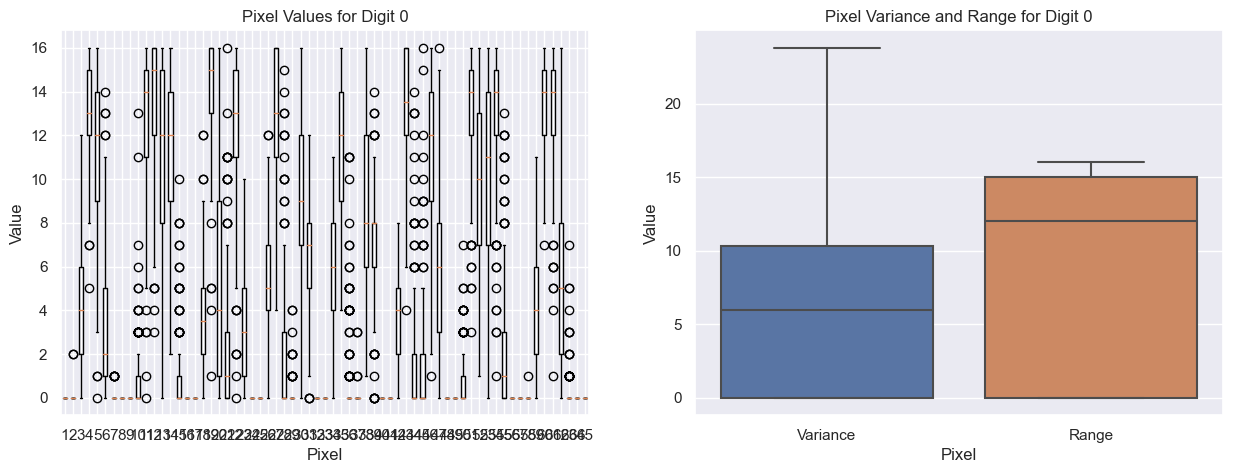

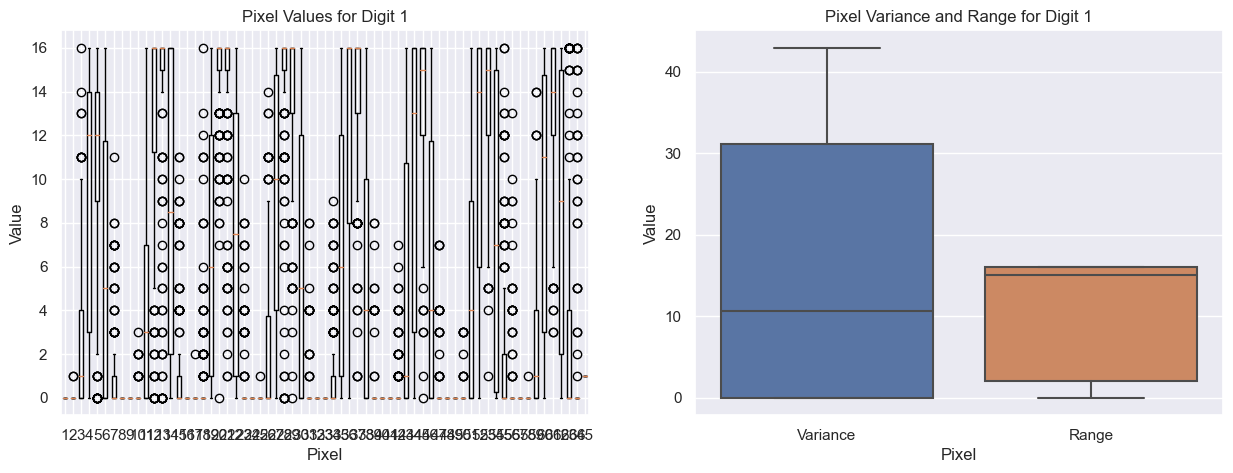

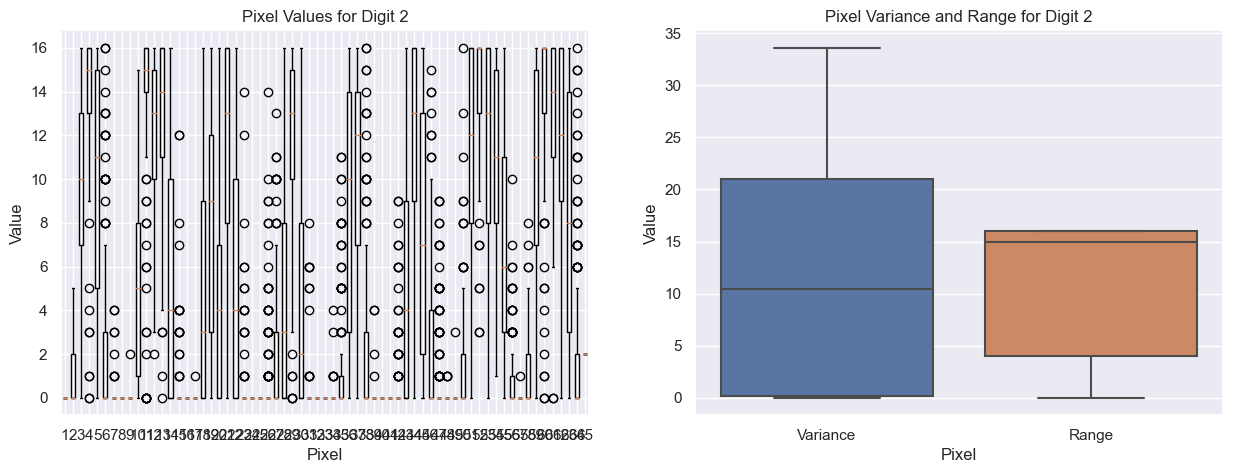

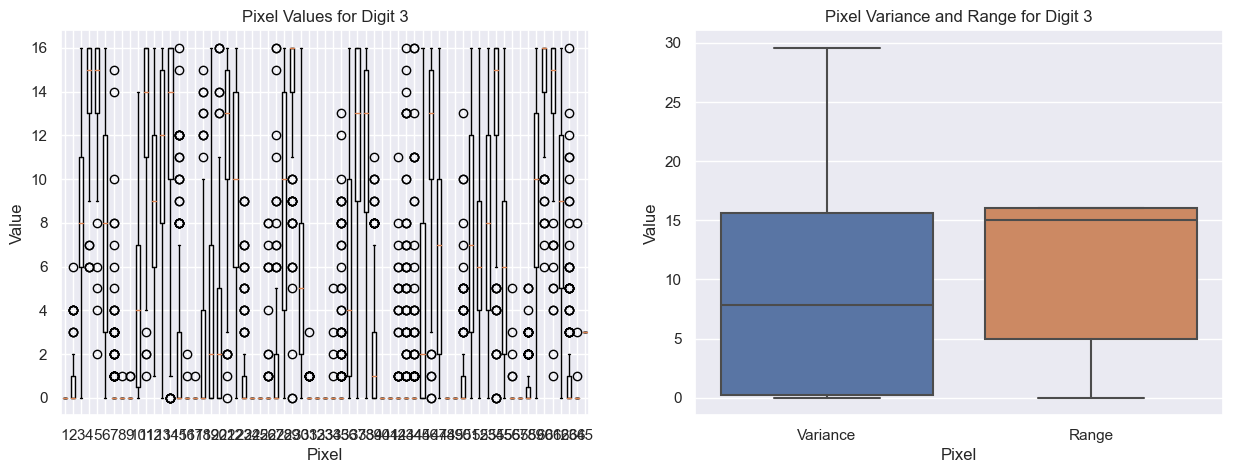

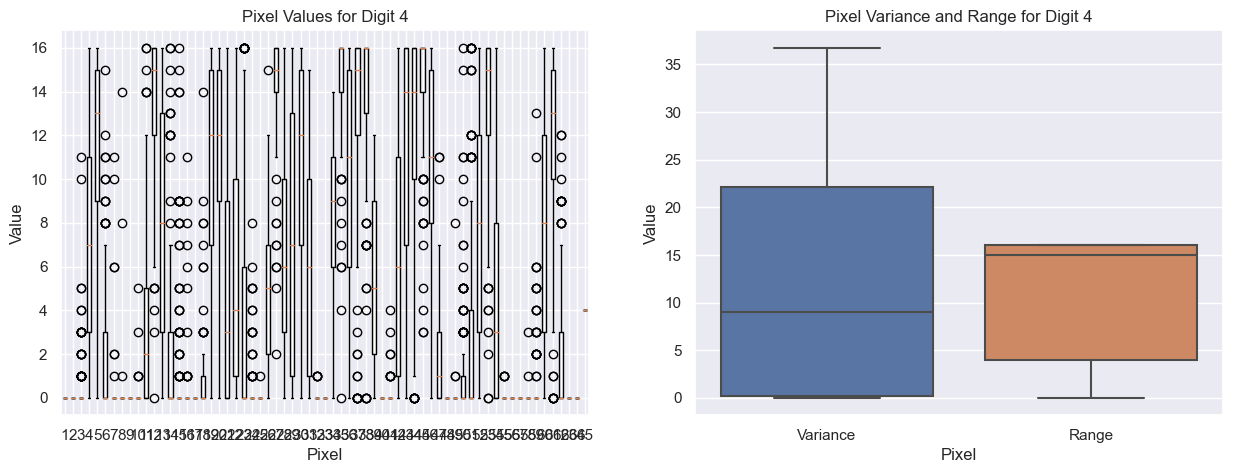

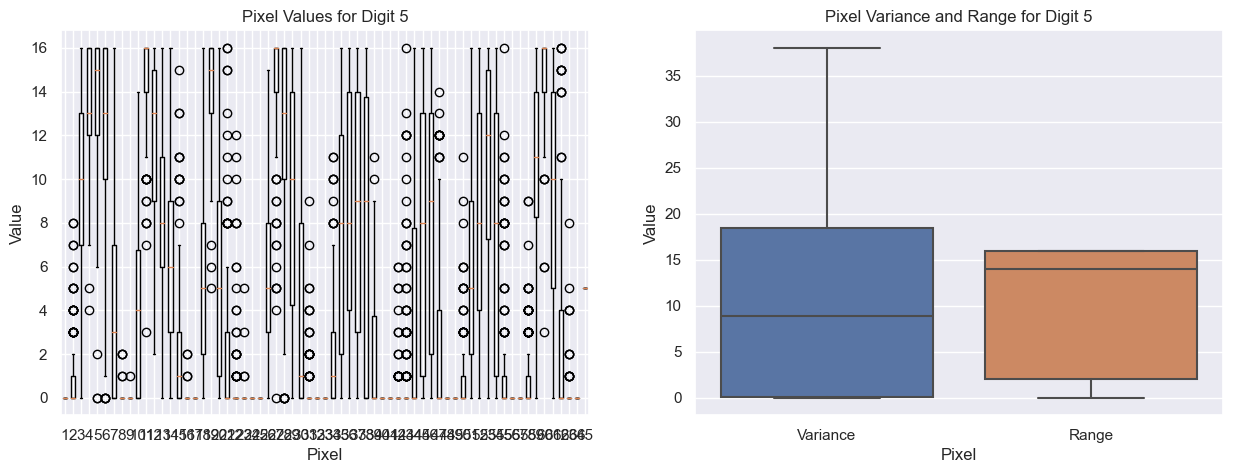

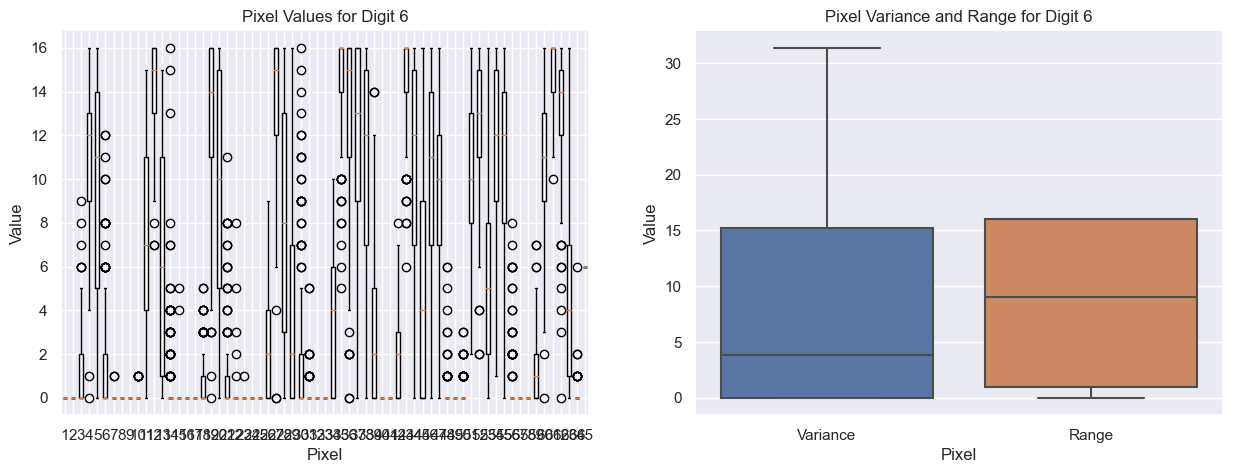

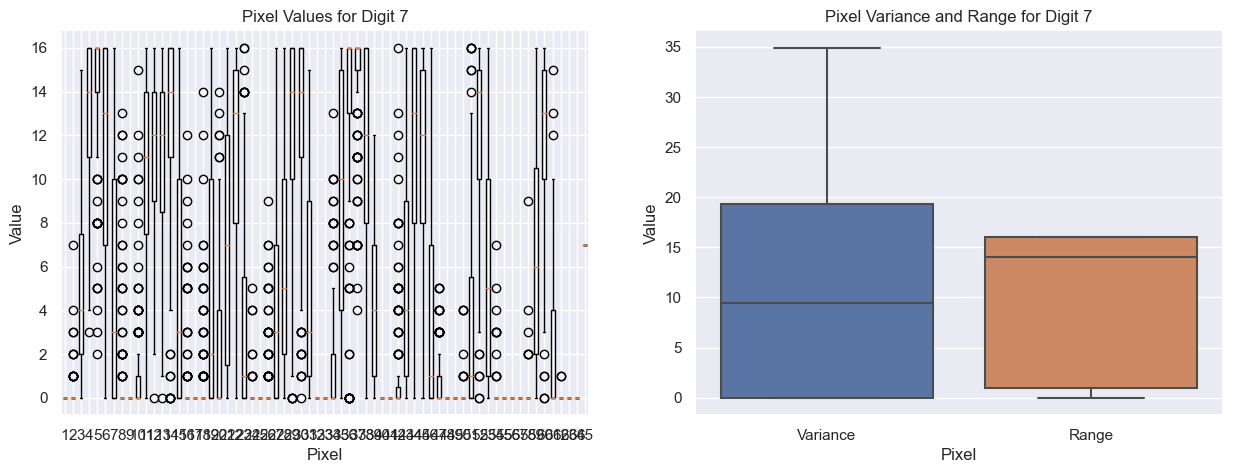

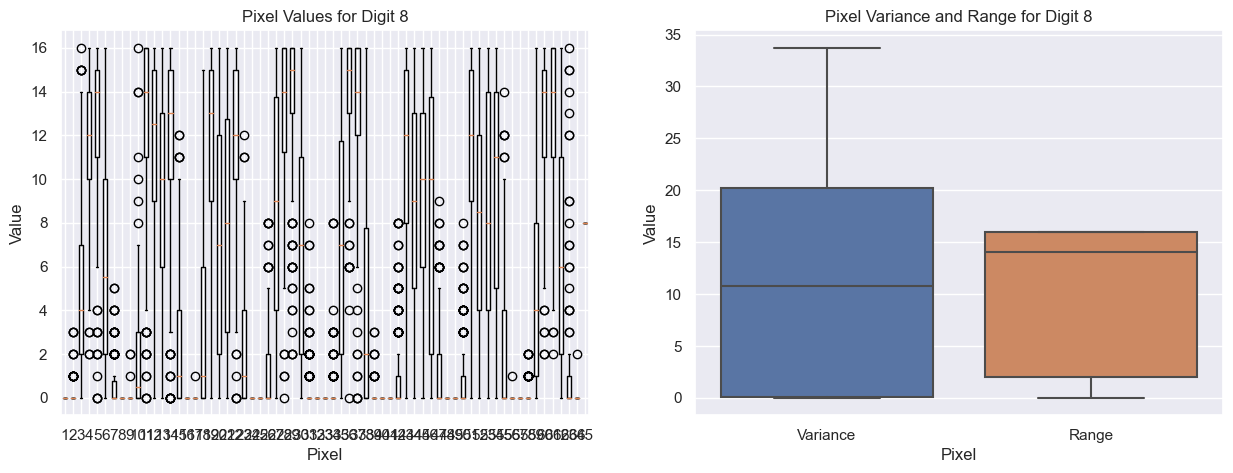

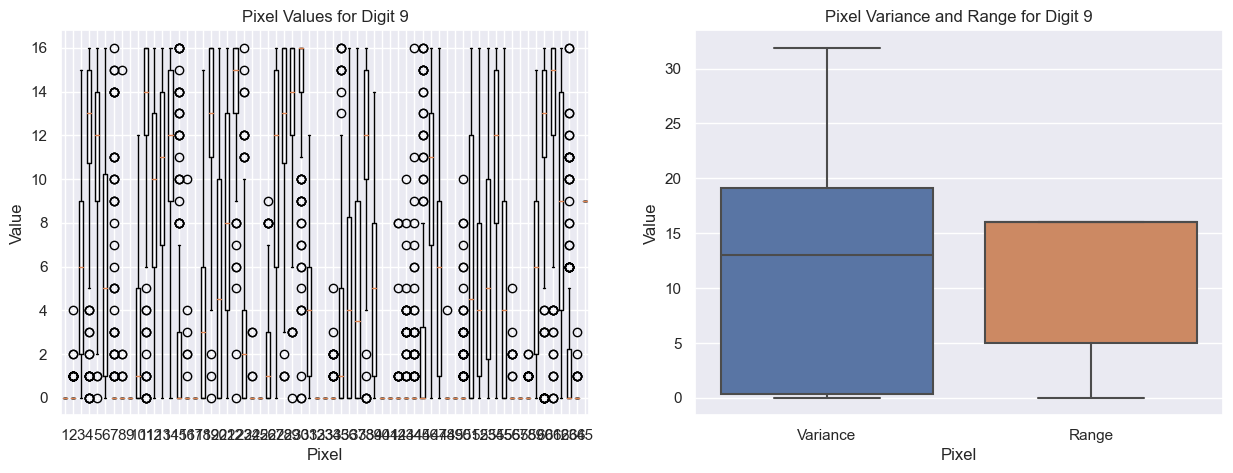

In [85]:
def boxplot_target(target):
    # Setup two columns for Boxplot and an Histogram for Variance & Range
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    
    # Create a boxplot of the pixel values for the given target
    ax1.boxplot(digits_df[digits_df.target == target])
    # Add labels and title
    ax1.set_xlabel("Pixel")
    ax1.set_ylabel("Value")
    ax1.set_title(f"Pixel Values for Digit {target}")

    # Calculate the variance and range for the pixel values according to the digit target
    pixels_var = digits_df[digits_df.target == target].var(axis=0)
    pixels_range = digits_df[digits_df.target == target].max(axis=0) - digits_df[digits_df.target == target].min(axis=0)

    # Create a dataframe for pixels Variance & Range
    df = pd.DataFrame({'Variance': pixels_var, 'Range': pixels_range})

    # Plot the boxplots for pixels Variance & Range
    sns.boxplot(data=df, ax=ax2)
    ax2.set_xlabel("Pixel")
    ax2.set_ylabel("Value")
    ax2.set_title(f"Pixel Variance and Range for Digit {target}")
    plt.show()

for target in digits_df.target.unique():
    boxplot_target(target)


# Target Distribution Analysis

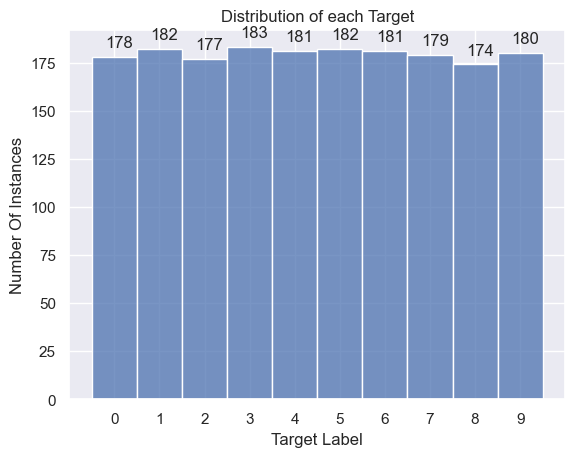

In [86]:
# Distribution of each Target using a histogram
sns.set()
ax = sns.histplot(data= digits_df, x=digits_df.columns[-1],discrete=(True, True))
plt.xticks(digits_df.target.unique())
plt.title("Distribution of each Target")
plt.xlabel("Target Label")
plt.ylabel("Number Of Instances")

# Add the count of instances for each target value on top of the histogram
for p in ax.patches:
    offset = 0.3
    ax.annotate(f"{p.get_height()}", (p.get_x() + offset, p.get_height() + 5))

The distribution analysis is required in order to ensure the Digist dataset is balanced.

# Feature Variance

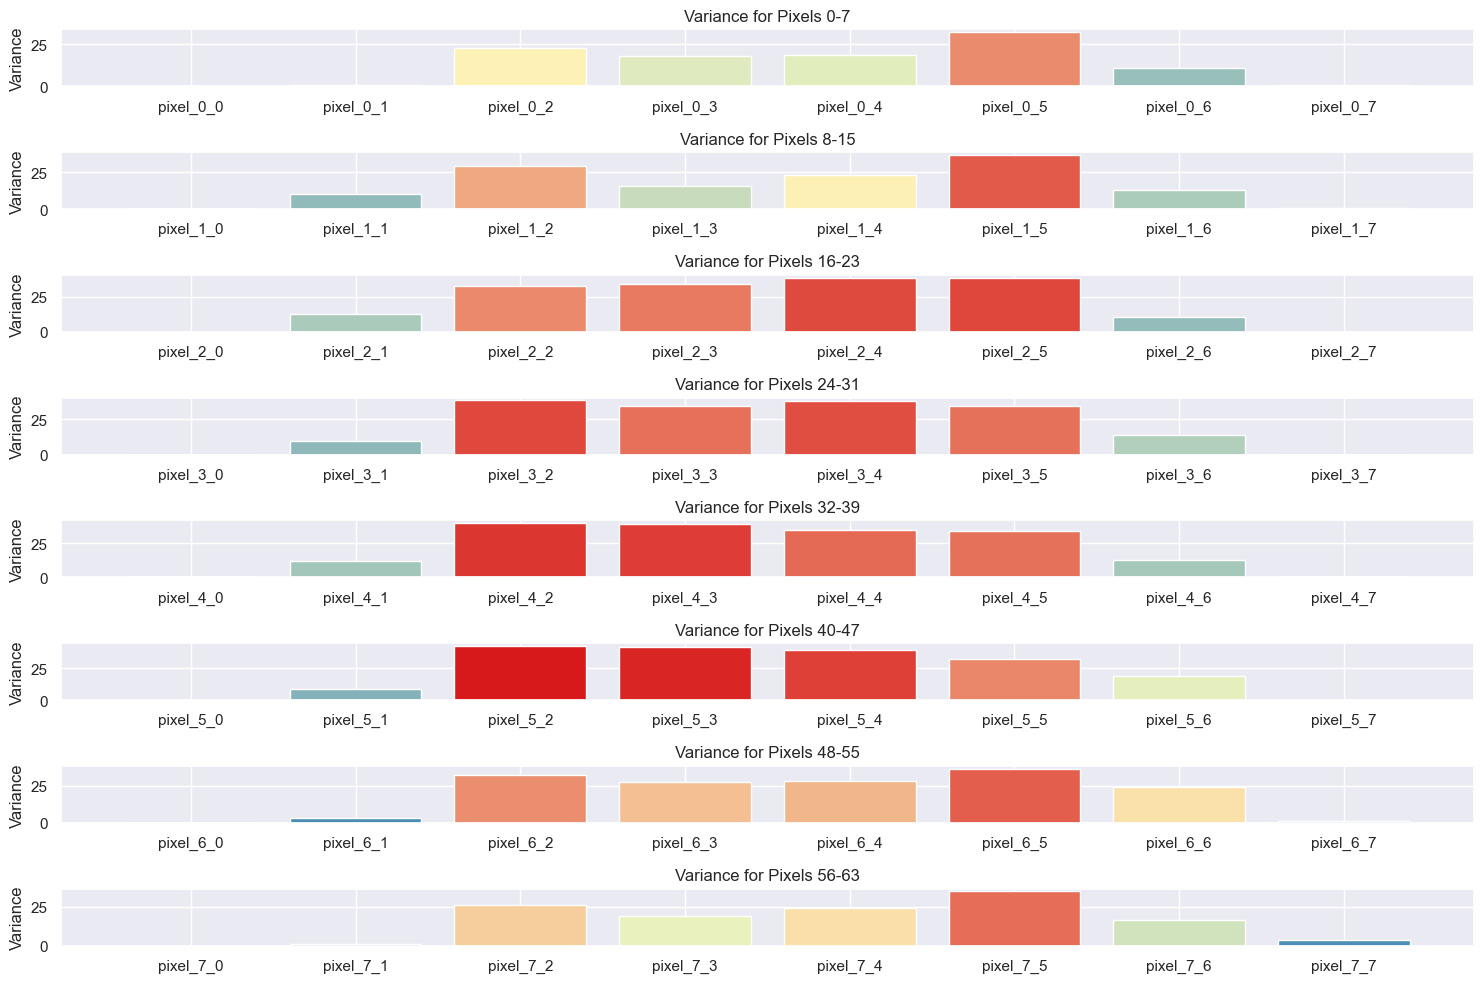

In [87]:
num_subplots = 8
# Colors SETUP
pixels_var = digits_df.drop(columns=['target']).var(axis=0)
cmap = colors.LinearSegmentedColormap.from_list('variance', ['#2c7bb6', '#ffffbf', '#d7191c'])
norm = colors.Normalize(vmin=pixels_var.min(), vmax=pixels_var.max())
colors_list = cmap(norm(pixels_var))


fig, axs = plt.subplots(num_subplots, 1, figsize=(15, 10))

# Plot the variance for each pixel in each subplot
for i in range(num_subplots):
    start_idx = i * len(pixels_var) // num_subplots
    end_idx = (i + 1) * len(pixels_var) // num_subplots
    axs[i].bar(range(start_idx, end_idx), pixels_var[start_idx:end_idx], color=colors_list[start_idx:end_idx])
    axs[i].set_xticks(range(start_idx, end_idx))
    axs[i].set_xticklabels(pixels_var.index[start_idx:end_idx])
    axs[i].set_ylabel('Variance')
    axs[i].set_title(f'Variance for Pixels {start_idx}-{end_idx-1}')
    
plt.tight_layout()
plt.show()


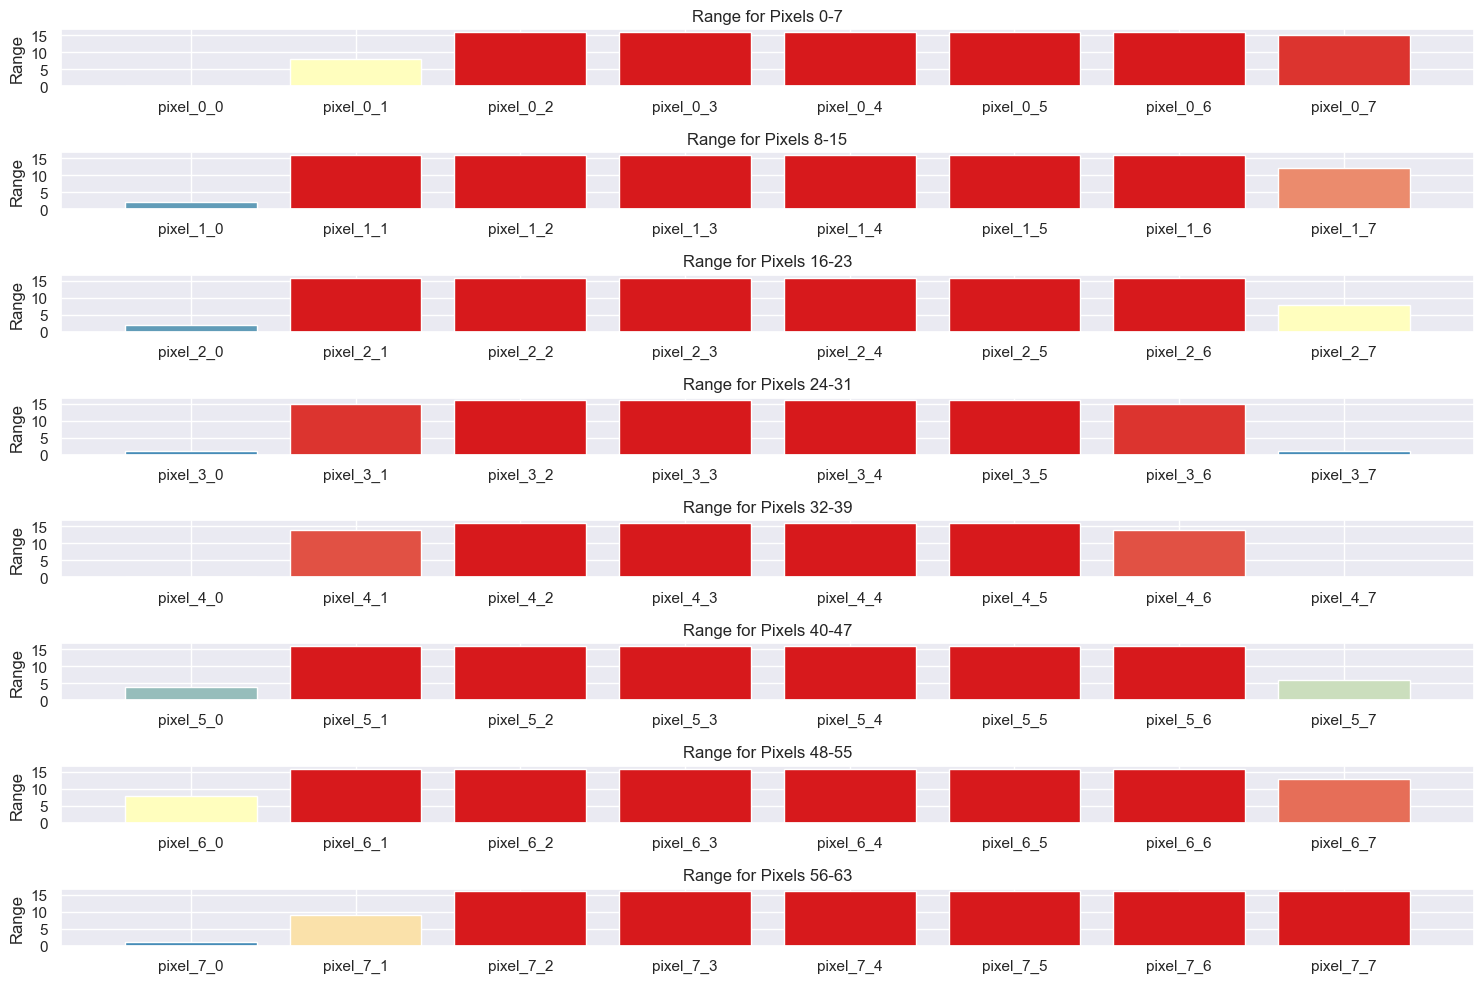

In [88]:
num_subplots = 8
fig, axs = plt.subplots(num_subplots, 1, figsize=(15, 10))
pixels_range = digits_df.drop(columns=['target']).max(axis=0) - digits_df.drop(columns=['target']).min(axis=0)

# Colors SETUP
cmap = colors.LinearSegmentedColormap.from_list('range', ['#2c7bb6', '#ffffbf', '#d7191c'])
norm = colors.Normalize(vmin=pixels_range.min(), vmax=pixels_range.max())
colors_list = cmap(norm(pixels_range))


# Plot the range for each pixel in each subplot
for i in range(num_subplots):
    start_idx = i * len(pixels_range) // num_subplots
    end_idx = (i + 1) * len(pixels_range) // num_subplots
    axs[i].bar(range(start_idx, end_idx), pixels_range[start_idx:end_idx], color=colors_list[start_idx:end_idx])
    axs[i].set_xticks(range(start_idx, end_idx))
    axs[i].set_xticklabels(pixels_range.index[start_idx:end_idx])
    axs[i].set_ylabel('Range')
    axs[i].set_yticks(np.arange(0, pixels_range.max() + 1, 5))
    axs[i].set_title(f'Range for Pixels {start_idx}-{end_idx-1}')

plt.tight_layout()
plt.show()


# Distinction: Variance & Ranges of Frame 
The boundary pixels in the digist datasets have low variance, probably due to their mostly uniform intensity value, which is typically zero. We can see that the range of the centerd pixels has wider range and higher variance as they are affected by changes in the images.

# Features Correlation Analysis

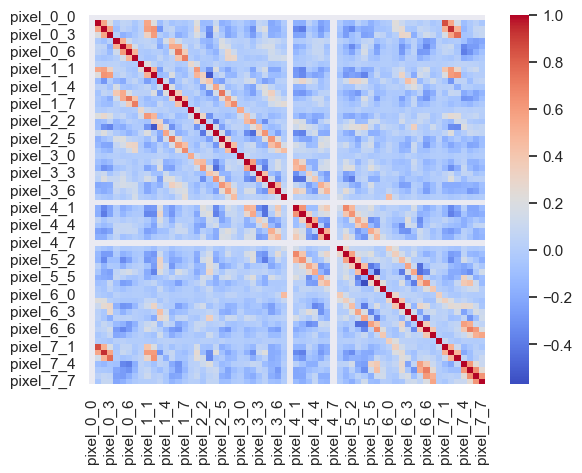

In [89]:
# Calculate the correlation matrix
cor_matrix = digits_df.iloc[:,:-1].corr()
# Plot a correlation heatmap 
sns.heatmap(cor_matrix, cmap='coolwarm')
plt.show()

By reviewing the ENTIRE dataset: 
From the diagonals we can assume that the pixels that are close to each other are often part of the same structure (e.g., curves or lines) or frames (pixel_7_1 and pixel_0_1). Therefore, they are likely to change together when the structure changes.  This leads to a correlation between these pixels.


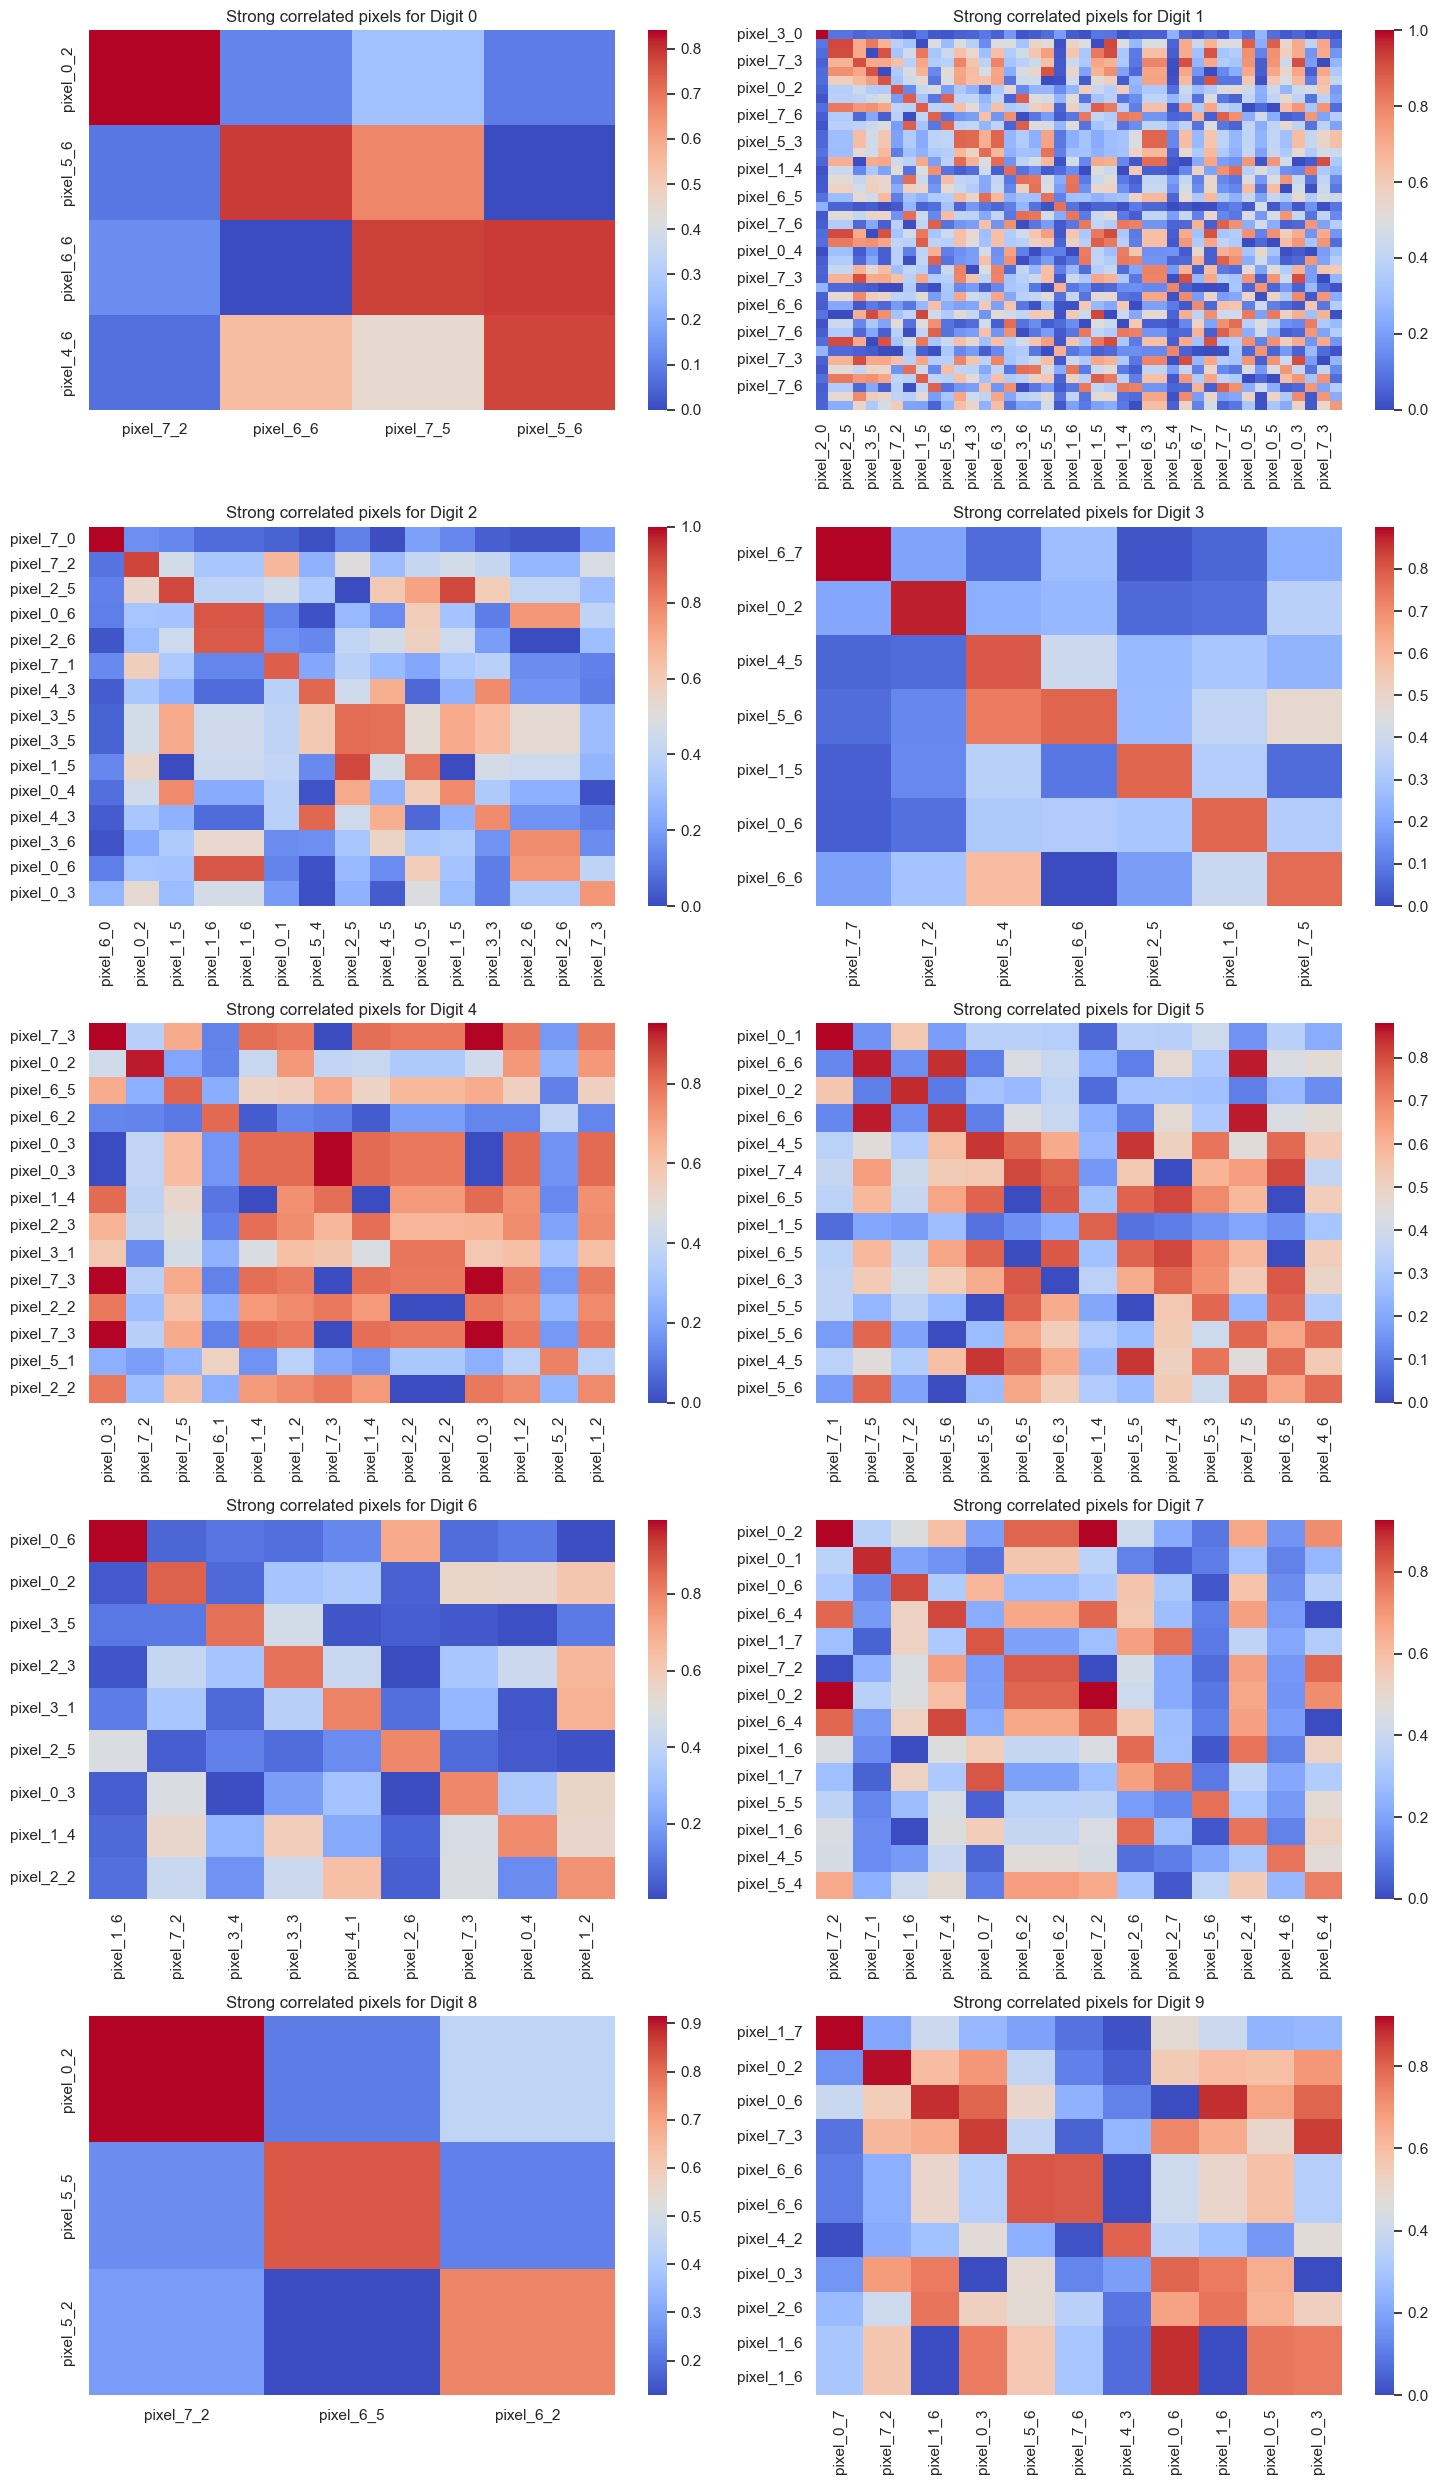

In [90]:

STRONG_CORRELATION = 0.75

# Generate a grid for heatmaps 
num_subplots = len(digits_df['target'].unique())
num_rows = num_subplots // 2 + num_subplots % 2
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Generate heapmap for each target number and its strong correlated features:
for i, target_value in enumerate(digits_df.target.unique()):
    row, col = i // 2, i % 2
    
    # Calculate correlation matrix for current target
    target_df = digits_df[digits_df.target == target_value]
    corr_matrix = target_df.corr().abs()

    # Remove diagonal values (each value and itselves)
    corr_matrix.values[tuple([np.arange(corr_matrix.shape[0])]*2)] = 0
    
    # Get strong correlated features for current target
    strong_correlated_pixels = corr_matrix[corr_matrix > STRONG_CORRELATION].unstack().sort_values(ascending=False).drop_duplicates().dropna()
    
    # Plot on the grid
    sns.heatmap(corr_matrix.loc[strong_correlated_pixels.index.get_level_values(0),
                                 strong_correlated_pixels.index.get_level_values(1)],cmap='coolwarm', ax=axs[row, col])
    axs[row, col].set_title(f"Strong correlated pixels for Digit {target_value}")
    
# Remove empty subplots
if num_subplots % 2 == 1:
    fig.delaxes(axs[num_rows-1, 1])
    
plt.tight_layout()
plt.show()


# Analysis Summary
The orignal dataset is balances with approx ~180 items per target,
We can see that there is an high correlation between nearby pixels that vary between targets.
Overall, observing the entire dataset, besides nearby pixels, the frame pixels are also correlated as they are usually blanks.
Moreover, We could distiniush which are the most correlated pixels for each digit target number (as they are part of a structure, curve or a line).

# Playground (Plotting Figures) 

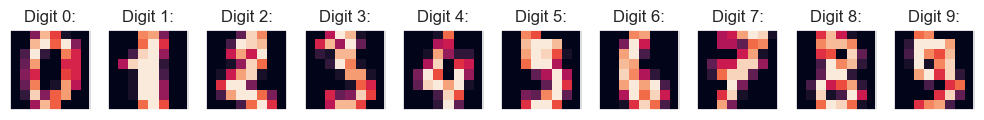

In [91]:
# Get all unique targets (from 0 to 9)
targets = digits_df.target.unique()
fig, axes = plt.subplots(1, len(targets), figsize=(10, 8))

for i, target in enumerate(targets):
    #convert each row into a (8,8) shape to plot as in image
    img = digits_df[digits_df.target == target].iloc[0, :-1].values.reshape(8, 8)
    axes[i].imshow(img)
    axes[i].set_title(f"Digit {target}:")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

# Test and Train split - LogisticRegression
Use sklearn function test train split to split the data to test-set and train-set, for
each test-size ratio r ∈ [0.1, 0.2, 0.3, ..., 0.9], and use skleran LogisticRegression to
train a logistic regressor on the train-set and evaluate the accuracy on the test-set. Use
matplotlib.pyplot to plot the accuracy of each r (using r as x axis and accuracy as
y axis).

In [92]:
X = digits_df.iloc[:,:-1]
y = digits_df.target
print(f'X shape is {X.shape}, y shape is {y.shape}')

X shape is (1797, 64), y shape is (1797,)


In [93]:

def balanced_accuracy(model, X_train, X_test, y_train, y_test):
    #  fits the model with the training dataset and assess the accuracy_score.
    # we should use 'balanced_accuracy_score' when the target variable is imbalanced, 
    # in this case, we will use stratify parameter within the train_test_split to ensure balance of the train and test sets.
    LGR = model.fit(X_train, y_train)
    y_pred = LGR.predict(X_test)
    return accuracy_score(y_test, y_pred)

def model_accuracy_calculator(model, X, y, r_ratio_values):
    # Using matplotlib.pyplot to plot the accuracy of each r (using r as x axis and accuracy as y axis).
    accuracies = []
    for r in r_ratio_values:
        # using seed as a random state, 100, to obtain the same result every iteration.
        # stratify is used to ensure that the same proportion of target classes are present in both the training and testing sets.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state=100, stratify=y)
        acc = balanced_accuracy(model, X_train, X_test, y_train, y_test)
        accuracies.append(acc)
    plt.title('The accuracy on the test-set')
    plt.xlabel('Test ratio')
    plt.ylabel('Accuracy')
    plt.plot(r_ratio_values, accuracies)

    

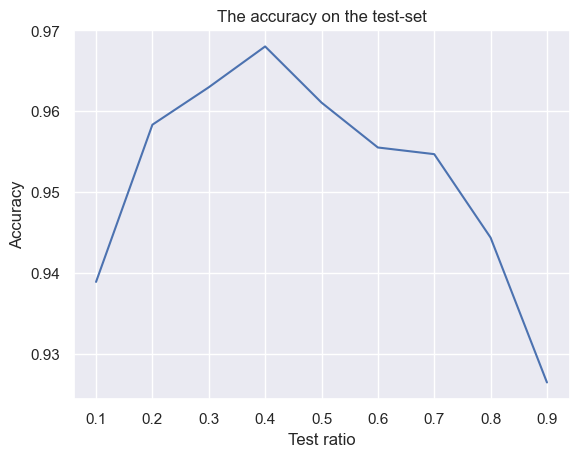

In [94]:
# ratio r ∈ [0.1, 0.2, 0.3, ..., 0.9]
r_ratio_values = np.arange (0.1, 1, 0.1)
# set random_state to be 40 to ensure the results will be the same for the tester.
# default max_iter is 100, raised to 1000 as the model failed to converge.
LGR = LogisticRegression(random_state=40, max_iter=1000)
model_accuracy_calculator(LGR, X, y, r_ratio_values)

We can infer that when test size is grown at the expense of the train size (~test size ratio 0.4) there is a major accuracy decrese.
This happens due to a lower amount of samples on which the model is trained.


# Creating un-balanced dataset
The 1800 samples dataset is completely balanced (each label has 180 samples). Create
a sub-dataset from it, of size 1000, which is unbalanced.


In [144]:
#Generating imbalanced dataset by randomly choosing different amount of each label

X = digits_df.iloc[:,:-1]
y = digits_df.target
# Define the imbalanced sub-dataset
imbalanced_subset = {
    0: 50,
    1: 150,
    2: 50,
    3: 50,
    4: 50,
    5: 150,
    6: 100,
    7: 200,
    8: 100,
    9: 100
}

X_subset = []
y_subset = []

# Iterate over each digit and randomly select the specified number of samples
for digit, num_samples in imbalanced_subset.items():
    digit_indices = np.where(y == digit)[0]
    selected_indices = np.random.choice(digit_indices, size=num_samples, replace=True)
    X_subset.append(X.loc[selected_indices])
    y_subset.append(y.loc[selected_indices])

# Concatenate the selected samples into a single array
X_subset = np.concatenate(X_subset)
X_subset = pd.DataFrame(X_subset, columns=X.columns)

y_subset = np.concatenate(y_subset)
y_subset = pd.Series(y_subset)



# Print the shapes of the resulting sub-dataset
print("Shape of X_subset:", X_subset.shape)
print("Shape of y_subset:", y_subset.shape)
unbalanced_df = pd.concat([pd.DataFrame(X_subset), y_subset.rename('target')], axis=1)
print("Shape of unbalanced_df:", unbalanced_df.shape)

Shape of X_subset: (1000, 64)
Shape of y_subset: (1000,)
Shape of unbalanced_df: (1000, 65)


# Balance the un-balanced dataset

In [165]:
def balance_an_unbalance_dataset(unbalanced_df):
    l_min = unbalanced_df.target.value_counts().min()
    print(f'l_min equals to {l_min}')
    grouped = unbalanced_df.groupby('target')
    
    selected_targets = []
    for label, group in grouped:
        # Create an empty list to store the selected samples
        #select l_min sampled for each target (each gruop)
        indices = np.random.choice(group.index, l_min, replace=False)
        selected_targets.append(group.loc[indices])

    balanced_df = pd.concat(selected_targets)
    return balanced_df
balanced_df = balance_an_unbalance_dataset(unbalanced_df)

l_min equals to 50


Validating that the dataset is balancded:

In [168]:
balanced_df.target.value_counts()

0    50
1    50
2    50
3    50
4    50
5    50
6    50
7    50
8    50
9    50
Name: target, dtype: int64

# Plotting model's accuracy on the balanced dataset

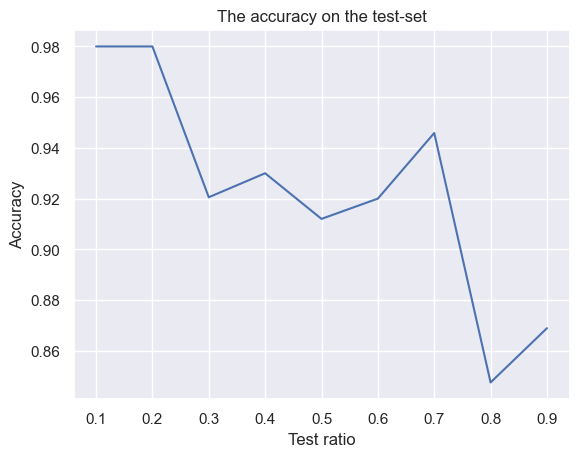

In [169]:
new_LGR = LogisticRegression(random_state=40, max_iter=1000)
X = balanced_df.iloc[:,:-1]
y = balanced_df.target
model_accuracy_calculator(new_LGR, X, y, r_ratio_values)

Currently, the overall size of the dataset is smaller than the previous experiment (starting with ratio 0.2), therefore the model accuracy decreases more sharply, as the train_set size begins with the size of 50 and growing at the expense of the training set (which is now at the size of 450, instead of 1620 at the previoues experiment)

# na¨ıve k-features selection algorithm
Run a na¨ıve k-features selection algorithm that for each set of k features from the data
trains a classifier on the train-set, and selects the set of k features that achieved the
best accuracy on the test-set. Implement a function that gets train-set, test-set,
and k and returns the best k features from the dataset and the accuracy achieved on
the test-set. Run the function with k = 2 and print the results

In [252]:
import itertools

def naive_k_features_selection(train_set, test_set, k):

    LGR = LogisticRegression(random_state=100)
    best_k_features = []
    max_accuracy = 0
    for k_comb in combinations(range(test_set.shape[1] - 1), k):
        k_comb = list(k_comb)
        X_train_comb = train_set.iloc[:,k_comb]
        X_test_comb = test_set.iloc[:, k_comb]
        LGR = LGR.fit(X_train_comb, Y_train)
        acc = LGR.score(X_test_comb, Y_test)
        if acc > max_accuracy:
            max_accuracy = acc
            best_k_features = X_train.columns[list(k_comb)]

    return best_k_features, max_accuracy


In [255]:
X = balanced_df.iloc[:,:-1]
y = balanced_df.target
k = 2
ratio = 0.4 # randomly selected as not mentioned in the Assigment
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=ratio, random_state=100)

df_test = pd.concat([pd.DataFrame(X_test), Y_test.rename('target')], axis=1)
df_train = pd.concat([pd.DataFrame(X_train), Y_train.rename('target')], axis=1)
best_k_features, max_accuracy = naive_k_features_selection(df_train, df_test, k )
print(f'best k features: {best_k_features}, with accuracy of : {max_accuracy}')

best k features: Index(['pixel_2_5', 'pixel_5_2'], dtype='object'), with accuracy of : 0.475
